<a href="https://colab.research.google.com/github/chetzkmr/Particle-Physics-Events-Classification/blob/main/Physics_particle_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of physics particle event experiment

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#importing the data
df=pd.read_csv('/content/drive/MyDrive/Placement project mar/Copy of Data.csv')
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
df.shape

(250000, 33)

In [ ]:
df.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

No null values avialable

In [ ]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.416643,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.482458,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,9.000000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
df.describe(include=['object'])

,Label
count,250000
unique,2
top,b
freq,164333


In [ ]:
df.nunique()

EventId                        250000
DER_mass_MMC                   108338
DER_mass_transverse_met_lep    101637
DER_mass_vis                   100558
DER_pt_h                       115563
DER_deltaeta_jet_jet             7088
DER_mass_jet_jet                68366
DER_prodeta_jet_jet             16593
DER_deltar_tau_lep               4692
DER_pt_tot                      59042
DER_sum_pt                     156098
DER_pt_ratio_lep_tau             5931
DER_met_phi_centrality           2829
DER_lep_eta_centrality           1002
PRI_tau_pt                      59639
PRI_tau_eta                      4971
PRI_tau_phi                      6285
PRI_lep_pt                      61929
PRI_lep_eta                      4987
PRI_lep_phi                      6285
PRI_met                         87836
PRI_met_phi                      6285
PRI_met_sumet                  179740
PRI_jet_num                         4
PRI_jet_leading_pt              86590
PRI_jet_leading_eta              8558
PRI_jet_lead

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

In [ ]:
df.dtypes

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

All the data types are numerical

In [ ]:
df.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

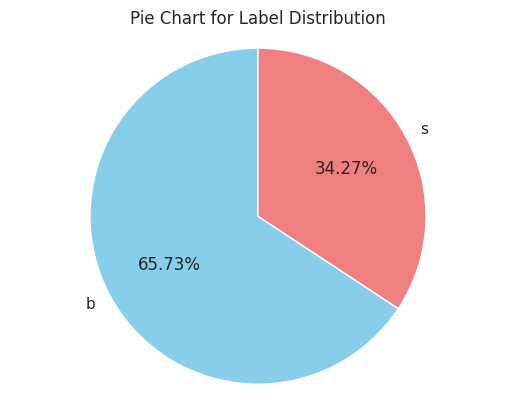

In [ ]:
# Pie chart to observe the distribution of label column
labels = df['Label'].value_counts().index
sizes = df['Label'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.axis('equal')
plt.title('Pie Chart for Label Distribution')
plt.show()

**Data is imbalanced**

In [ ]:
#checking for the most frequent repeated values
most_frequent_values = df.apply(lambda x: x.value_counts().idxmax())
print("Most frequent values in each column:")
print(most_frequent_values)

Most frequent values in each column:
EventId                          100000
DER_mass_MMC                     -999.0
DER_mass_transverse_met_lep         1.8
DER_mass_vis                     76.819
DER_pt_h                            0.0
DER_deltaeta_jet_jet             -999.0
DER_mass_jet_jet                 -999.0
DER_prodeta_jet_jet              -999.0
DER_deltar_tau_lep                3.094
DER_pt_tot                        1.072
DER_sum_pt                       76.854
DER_pt_ratio_lep_tau              0.901
DER_met_phi_centrality           -1.414
DER_lep_eta_centrality           -999.0
PRI_tau_pt                       21.134
PRI_tau_eta                       0.152
PRI_tau_phi                      -2.988
PRI_lep_pt                       28.855
PRI_lep_eta                       0.307
PRI_lep_phi                        3.05
PRI_met                          31.252
PRI_met_phi                      -2.091
PRI_met_sumet                   166.606
PRI_jet_num                           0
PRI

from the above observation we can see that the value -999 repeated in many column ; most of the time, it can be an error or missing value.

In [ ]:
#checking exacly how many times -999 has repeated
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print()

Column: EventId
100000    1
266657    1
266659    1
266660    1
266661    1
         ..
183337    1
183338    1
183339    1
183340    1
349999    1
Name: EventId, Length: 250000, dtype: int64

Column: DER_mass_MMC
-999.000    38114
 108.914       10
 96.819        10
 103.762       10
 108.957       10
            ...  
 47.910         1
 274.769        1
 191.831        1
 200.830        1
 217.020        1
Name: DER_mass_MMC, Length: 108338, dtype: int64

Column: DER_mass_transverse_met_lep
1.800      13
9.362      12
3.501      12
2.500      12
3.183      12
           ..
20.637      1
126.732     1
18.280      1
71.255      1
19.362      1
Name: DER_mass_transverse_met_lep, Length: 101637, dtype: int64

Column: DER_mass_vis
76.819     16
61.286     15
70.412     14
76.629     13
71.097     13
           ..
110.242     1
431.917     1
194.393     1
107.121     1
75.839      1
Name: DER_mass_vis, Length: 100558, dtype: int64

Column: DER_pt_h
0.000      41
1.843      25
0.697      25

**from the above observation we can confirm that -999 is an error or missing data**

In [ ]:
#replacing -999 with na values
df.replace(-999, np.nan, inplace=True)

In [ ]:
df.isnull().sum()/(len(df))*100

EventId                         0.0000
DER_mass_MMC                   15.2456
DER_mass_transverse_met_lep     0.0000
DER_mass_vis                    0.0000
DER_pt_h                        0.0000
DER_deltaeta_jet_jet           70.9824
DER_mass_jet_jet               70.9828
DER_prodeta_jet_jet            70.9828
DER_deltar_tau_lep              0.0000
DER_pt_tot                      0.0000
DER_sum_pt                      0.0000
DER_pt_ratio_lep_tau            0.0000
DER_met_phi_centrality          0.0000
DER_lep_eta_centrality         70.9828
PRI_tau_pt                      0.0000
PRI_tau_eta                     0.0000
PRI_tau_phi                     0.0000
PRI_lep_pt                      0.0000
PRI_lep_eta                     0.0000
PRI_lep_phi                     0.0000
PRI_met                         0.0000
PRI_met_phi                     0.0000
PRI_met_sumet                   0.0000
PRI_jet_num                     0.0000
PRI_jet_leading_pt             39.9652
PRI_jet_leading_eta      

<ipython-input-16-523e3e0bb6d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")


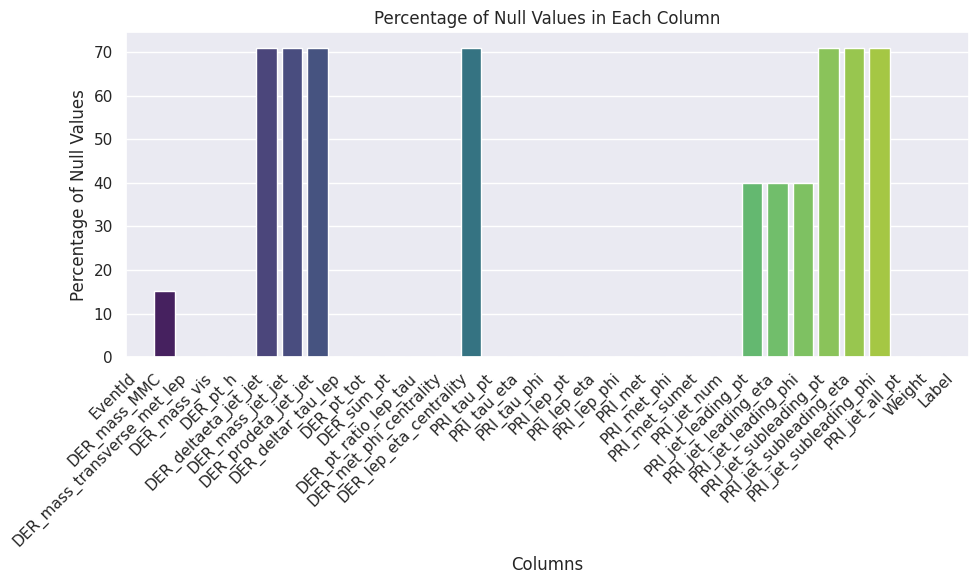

In [ ]:
null_percentage = df.isnull().mean() * 100

# Ploting a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")
plt.title("Percentage of Null Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Since the columns are having more than 30% of missing values we can drop them**

In [ ]:
#Along with na value columns we will also drop the eventid column since those columns are not going to be useful in this prediction
df.drop(['DER_deltaeta_jet_jet',
           'DER_mass_jet_jet',
           'DER_prodeta_jet_jet',
           'DER_lep_eta_centrality',
           'PRI_jet_leading_pt',
           'PRI_jet_leading_eta',
           'PRI_jet_leading_phi',
           'PRI_jet_subleading_pt',
           'PRI_jet_subleading_eta',
           'PRI_jet_subleading_phi',

           'EventId'], axis=1, inplace=True)

In [ ]:
#for column DER_mass_MMC we can fill na values with the median
df['DER_mass_MMC'].fillna(df['DER_mass_MMC'].median(), inplace=True)

In [ ]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,2.233584,b
2,112.406,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,53.321,-0.522,-3.100,31.082,0.060,86.062,0,0.000,5.446378,b
4,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,6.245333,b


In [ ]:
df.isna().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_all_pt                 0
Weight                         0
Label                          0
dtype: int64

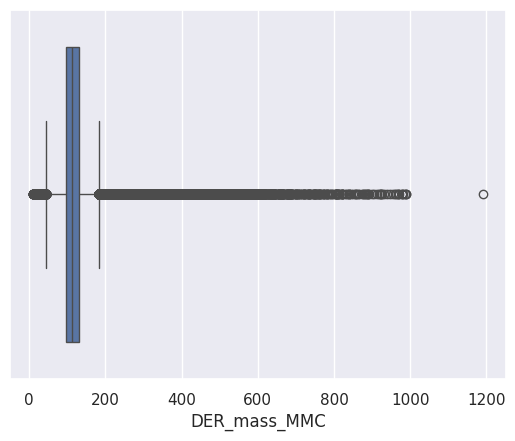

None


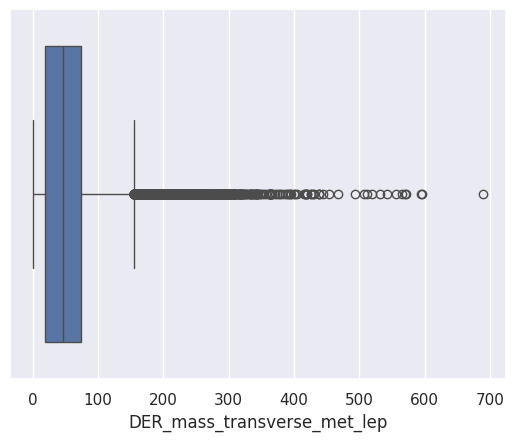

None


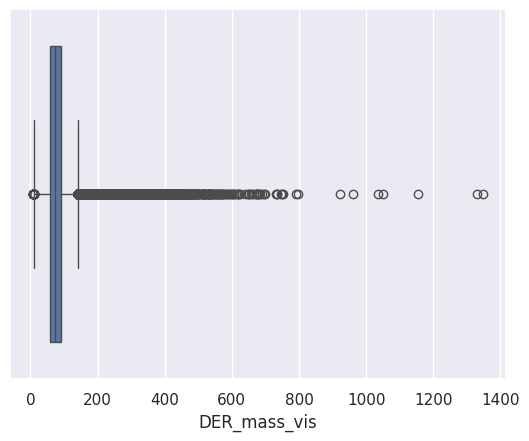

None


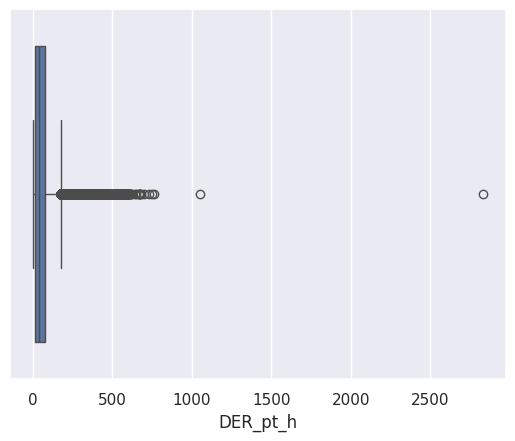

None


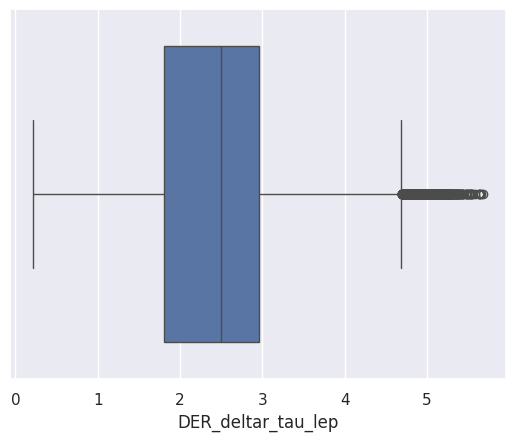

None


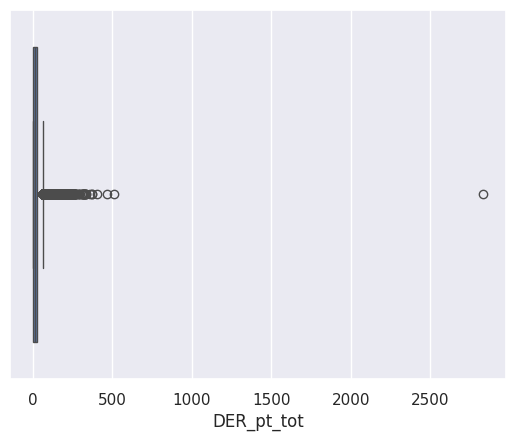

None


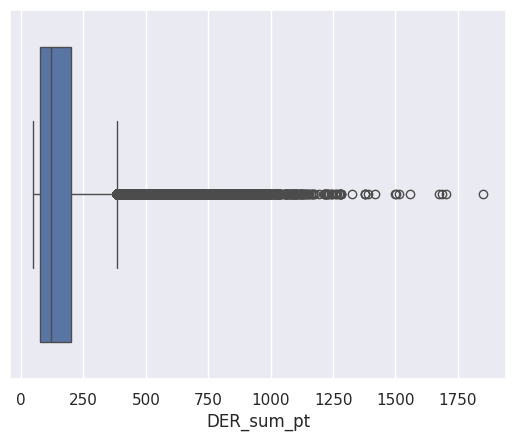

None


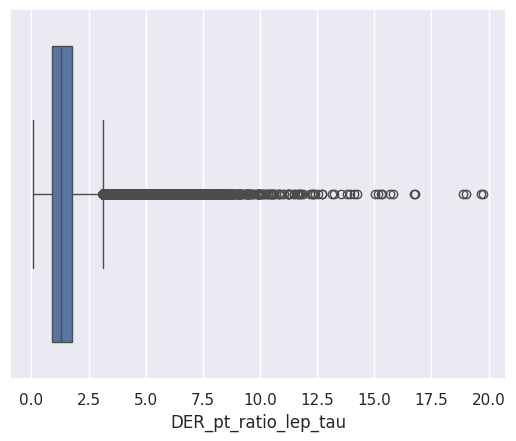

None


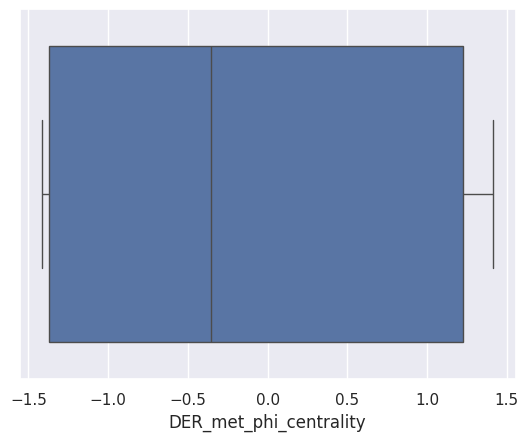

None


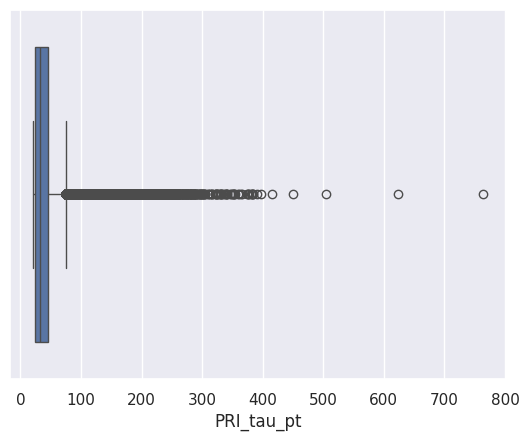

None


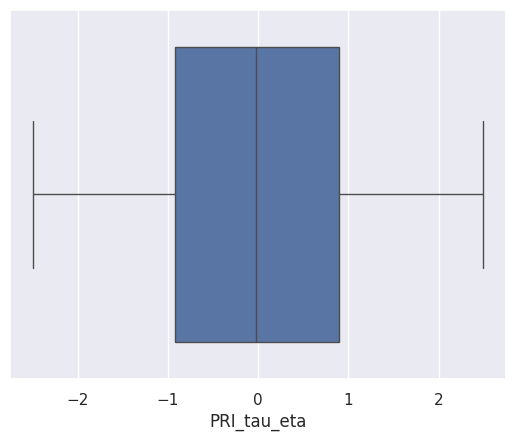

None


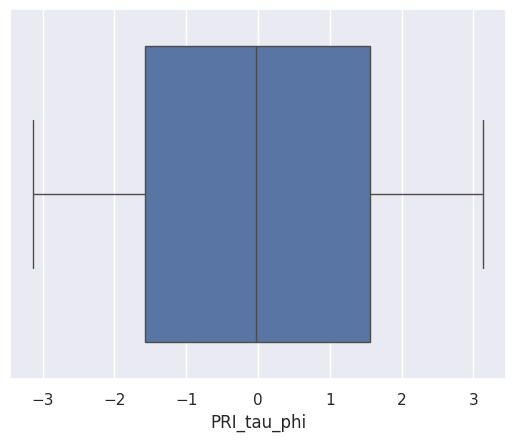

None


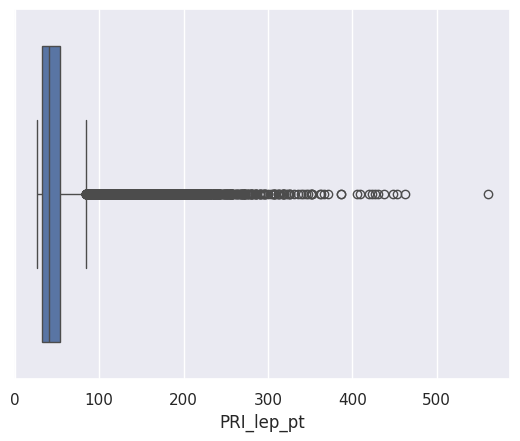

None


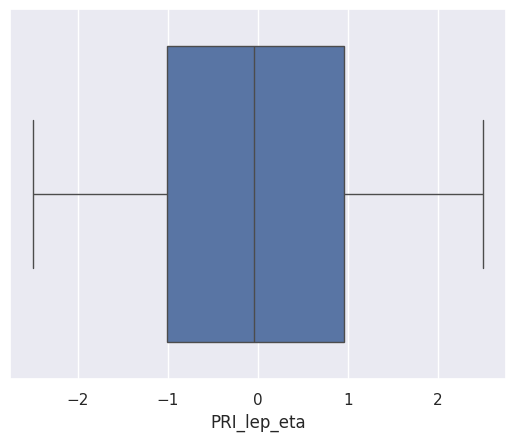

None


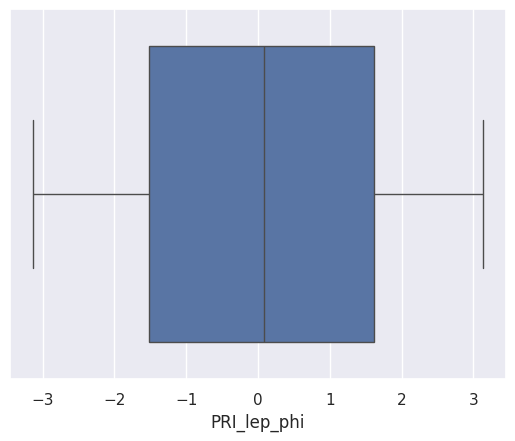

None


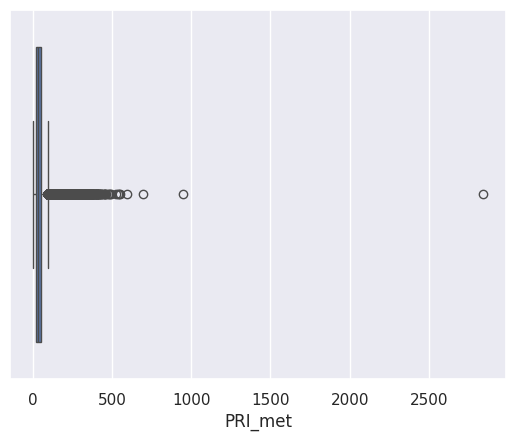

None


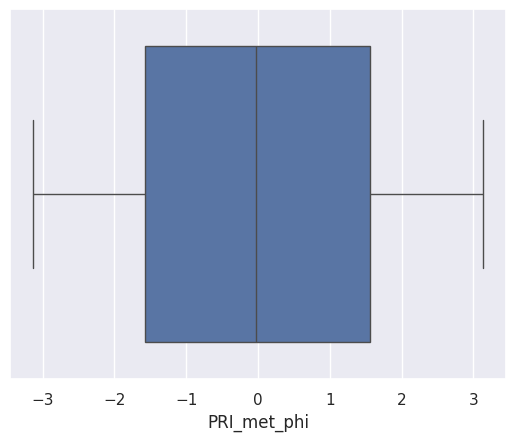

None


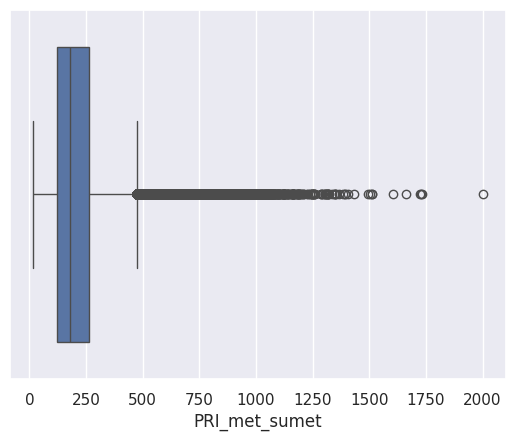

None


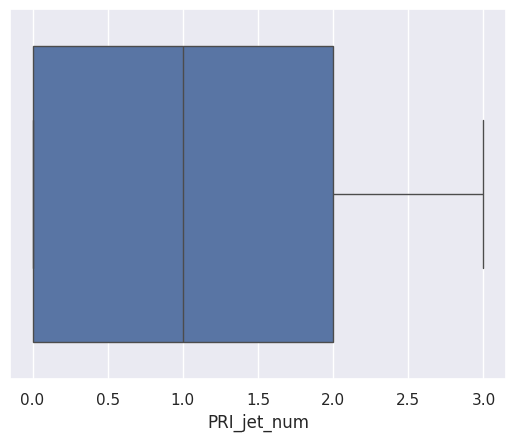

None


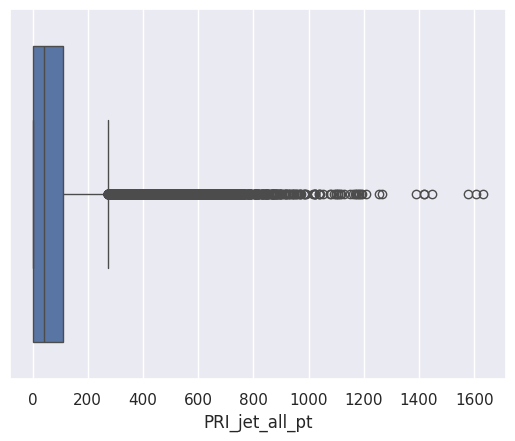

None


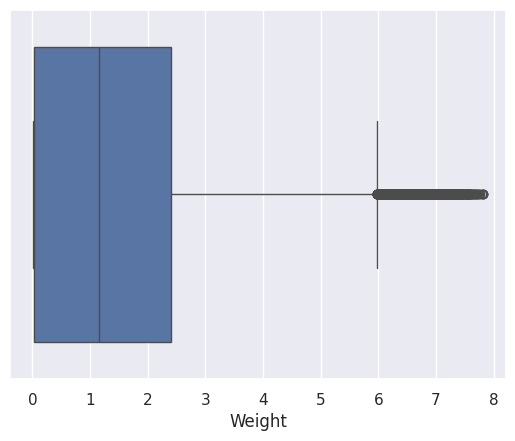

None


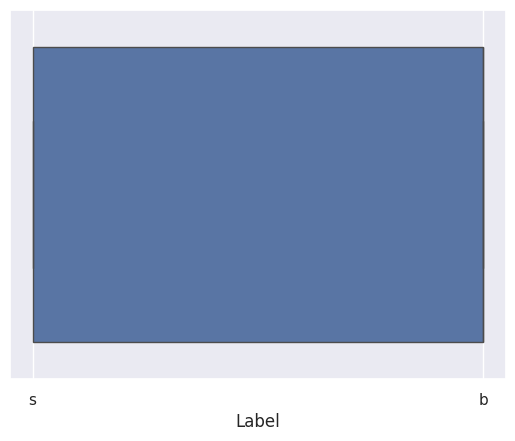

None


In [ ]:
#Checking for outliers
def bxplot(col):
  sns.boxplot(x=df[col])
  plt.show()

for i in list(df.columns):
  print(bxplot(i))

In [ ]:
#Treating the outliers using z-score
z_scores = np.abs((df - df.mean()) / df.std())
threshold = 20
outliers = (z_scores > threshold).any(axis=1)


print("Rows with outliers:")
print(df[outliers])
z_scores

<ipython-input-22-ace6ff028aa6>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())
<ipython-input-22-ace6ff028aa6>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())


Rows with outliers:
        DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
7343          83.124                      444.719        62.990  2834.999   
42689        112.406                      255.883        51.659    12.494   
49297        112.406                      162.198      1051.358   139.920   
52754         92.884                       51.047        66.825   673.770   
68117        259.505                        3.008        62.601  1053.807   
75797        112.406                       96.715      1034.205   211.086   
84175        112.406                       85.752      1153.166    58.563   
117359       103.866                       26.854        83.563   483.982   
118381       112.406                      103.808       922.885   277.764   
132402       112.406                       87.661      1329.913   204.044   
150377       122.312                      206.069       105.685   396.351   
151832      1192.026                       97.016       

,DER_deltar_tau_lep,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_met_phi_centrality,DER_pt_h,DER_pt_ratio_lep_tau,DER_pt_tot,DER_sum_pt,Label,...,PRI_lep_eta,PRI_lep_phi,PRI_lep_pt,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_tau_eta,PRI_tau_phi,PRI_tau_pt,Weight
0,0.882476,0.341522,0.068332,0.407679,1.277081,0.469965,0.170928,1.033096,0.339894,NaN,...,1.812284,1.352817,0.225054,0.756755,0.147267,0.386846,0.846710,0.214211,0.270810,0.876813
1,1.404885,0.766556,0.552504,0.540135,1.292162,0.153167,0.661277,0.756026,0.287584,NaN,...,0.411474,0.032730,0.441525,0.090798,1.051681,0.357718,1.688501,1.652846,0.147536,0.312952
2,0.989768,0.151562,3.195149,1.096558,1.292162,0.349709,2.768168,0.430167,0.340360,NaN,...,0.737949,0.555131,3.387675,0.382000,1.200670,0.400135,0.571649,1.147551,0.292406,0.373644
3,1.196688,0.444342,0.910377,0.005853,0.969093,0.903014,1.084816,0.830733,0.712704,NaN,...,0.397233,1.730443,0.301872,0.323312,0.038692,0.978148,1.354135,0.010002,0.716597,2.026347
4,1.938790,1.048948,0.914554,1.313366,1.052875,0.651803,0.451746,0.112795,0.868141,NaN,...,0.646260,0.839727,0.765296,1.185426,0.475041,1.238473,1.800565,1.223511,0.468427,2.452433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1.253143,0.151562,0.643634,1.093201,1.077171,0.830310,0.212620,0.622953,0.886213,NaN,...,0.735578,0.185211,0.703524,0.146004,1.583205,0.514881,0.331961,0.493641,0.622585,1.524351
249996,0.270657,0.151562,0.252913,0.320828,1.019362,0.557012,0.326264,0.158110,0.931794,NaN,...,0.258903,0.549626,0.881862,0.152601,0.472834,1.022843,1.316247,1.532490,0.682285,0.453571
249997,0.021586,0.283024,0.319316,0.130863,0.550698,0.284954,0.278913,0.146617,0.328161,NaN,...,0.316611,0.444485,0.173407,0.556267,1.589143,0.086089,0.210058,1.719448,0.137043,0.868289
249998,1.266938,0.481778,0.845322,0.302973,1.292162,0.697376,0.519222,0.243039,0.886498,NaN,...,0.675498,0.186910,0.849548,0.898845,0.453101,0.767427,1.812096,1.541297,0.480251,0.018582


In [ ]:
df1 = df[~outliers]

**now we apply the label encoding to the Label column**

In [ ]:
df1['Label'] = df1['Label'].map({'b': 0, 's' : 1})

<ipython-input-24-d2509f62c2a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Label'] = df1['Label'].map({'b': 0, 's' : 1})


In [ ]:
df1['Label'].value_counts()

0    164321
1     85662
Name: Label, dtype: int64

In [ ]:
#feature target split
x, y = df1.drop('Label', axis=1), df1['Label']

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
x_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight
2506,78.977,31.213,55.951,3.557,3.013,3.557,51.329,1.348,-1.353,21.865,...,-0.137,29.464,-0.155,-3.002,8.445,0.431,88.710,0,0.000,0.018636
71032,140.821,88.881,63.522,77.463,3.044,20.799,131.253,0.909,1.336,30.960,...,-2.776,28.131,-0.211,0.162,72.908,-2.592,174.985,1,72.161,0.307170
67569,89.909,76.220,67.433,21.285,2.949,21.285,69.373,1.577,0.943,26.919,...,1.921,42.454,-1.980,-1.026,34.504,1.931,153.793,0,0.000,2.061873
187026,116.897,15.578,77.621,31.479,3.152,31.479,78.828,0.567,1.414,50.305,...,1.043,28.523,0.141,-2.119,49.407,-2.537,171.191,0,0.000,0.018636
175702,108.342,40.473,80.067,25.558,2.267,11.854,122.165,0.992,-1.292,44.170,...,-2.471,43.811,-1.386,1.554,27.022,0.297,225.003,1,34.184,0.001503


In [ ]:
#balancing the target column by under sampling
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(x_train, y_train)

# Standardization of the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_resampled)
x_test_scaled = scaler.transform(x_test)
y_train=y_resampled


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
C = 0.0001  # Regularization strength (inverse of alpha, adjust as needed)
lr = LogisticRegression(penalty='l2', C=C, random_state=42)
lr.fit(x_train_scaled, y_train)
y_pred_train = lr.predict(x_train_scaled)
y_pred_test = lr.predict(x_test_scaled)

In [ ]:
#checking the accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_test )
print("Train Accuracy :", accuracy_score(y_train, y_pred_train)*100,'%')
print('Test Accuracy :',accuracy*100,'%')
print()
#classification report
print('Train classification report :')
print( classification_report(y_train, y_pred_train))
print()
print('Test classification report :')
print(classification_report(y_test, y_pred_test))
#confusion matrix
print('Train confusion matrix :')
print(confusion_matrix(y_train, y_pred_train))
print()
print('Test confusion matrix :')
print(confusion_matrix(y_test, y_pred_test))

Train Accuracy : 90.06263322334803 %
Test Accuracy : 87.62525751545093 %

Train classification report :
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     68494
           1       0.85      0.98      0.91     68494

    accuracy                           0.90    136988
   macro avg       0.91      0.90      0.90    136988
weighted avg       0.91      0.90      0.90    136988


Test classification report :
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     32829
           1       0.74      0.98      0.84     17168

    accuracy                           0.88     49997
   macro avg       0.86      0.90      0.87     49997
weighted avg       0.90      0.88      0.88     49997

Train confusion matrix :
[[56479 12015]
 [ 1598 66896]]

Test confusion matrix :
[[27008  5821]
 [  366 16802]]


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=100,
                                 max_depth=1,
                                 min_samples_split=5,
                                 min_samples_leaf=5,
                                 random_state=42)

rforest.fit(x_train_scaled, y_train)
y_pred_train_rf = rforest.predict(x_train_scaled)
y_pred_test_rf = rforest.predict(x_test_scaled)

print("Train Accuracy :", accuracy_score(y_train, y_pred_train_rf)*100,'%')
print("Test Accuracy :", accuracy_score(y_test, y_pred_test_rf)*100,'%')
print()
#classification report
print('Train classification report \n:', classification_report(y_train, y_pred_train_rf))
print('Test classification report :\n', classification_report(y_test, y_pred_test_rf))
#confusion matrix
print('Train confusion matrix :\n', confusion_matrix(y_train, y_pred_train_rf))
print('Test confusion matrix :\n', confusion_matrix(y_test, y_pred_test_rf))

Train Accuracy : 97.63482932811634 %
Test Accuracy : 97.77386643198592 %

Train classification report 
:               precision    recall  f1-score   support

           0       0.97      0.98      0.98     68494
           1       0.98      0.97      0.98     68494

    accuracy                           0.98    136988
   macro avg       0.98      0.98      0.98    136988
weighted avg       0.98      0.98      0.98    136988

Test classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     32829
           1       0.96      0.97      0.97     17168

    accuracy                           0.98     49997
   macro avg       0.97      0.98      0.98     49997
weighted avg       0.98      0.98      0.98     49997

Train confusion matrix :
 [[67205  1289]
 [ 1951 66543]]
Test confusion matrix :
 [[32212   617]
 [  496 16672]]


# XGBOOST Classifier

In [ ]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(max_depth=3,
                        min_child_weight=1,
                        subsample=0.1,
                        colsample_bytree=0.1,
                        colsample_bylevel=0.1,
                        n_estimators=10,
                        random_state=42)
xgboost.fit(x_train_scaled, y_train)
y_pred_train_xgb = xgboost.predict(x_train_scaled)
y_pred_test_xgb = xgboost.predict(x_test_scaled)

print("Train Accuracy :", accuracy_score(y_train, y_pred_train_xgb)*100,'%')
print("Test Accuracy :", accuracy_score(y_test, y_pred_test_xgb)*100,'%')
print()
#classification report
print('Train classification report :\n', classification_report(y_train, y_pred_train_xgb))
print('Test classification report :\n', classification_report(y_test, y_pred_test_xgb))
#confusion matrix
print('Train confusion matrix :\n', confusion_matrix(y_train, y_pred_train_xgb))
print('Test confusion matrix :\n', confusion_matrix(y_test, y_pred_test_xgb))

Train Accuracy : 94.71851549040792 %
Test Accuracy : 94.64367862071724 %

Train classification report :
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     68494
           1       0.94      0.95      0.95     68494

    accuracy                           0.95    136988
   macro avg       0.95      0.95      0.95    136988
weighted avg       0.95      0.95      0.95    136988

Test classification report :
               precision    recall  f1-score   support

           0       0.97      0.94      0.96     32829
           1       0.90      0.95      0.92     17168

    accuracy                           0.95     49997
   macro avg       0.94      0.95      0.94     49997
weighted avg       0.95      0.95      0.95     49997

Train confusion matrix :
 [[64655  3839]
 [ 3396 65098]]
Test confusion matrix :
 [[30977  1852]
 [  826 16342]]


#K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
y_pred_train_knn = knn.predict(x_train_scaled)
y_pred_test_knn = knn.predict(x_test_scaled)

#accuracy score
print("Train Accuracy :", accuracy_score(y_train, y_pred_train_knn)*100,'%')
print("Test Accuracy :", accuracy_score(y_test, y_pred_test_knn)*100,'%')
print()
#classification report
print('Train classification report :\n', classification_report(y_train, y_pred_train_knn))
print('Test classification report :\n', classification_report(y_test, y_pred_test_knn))
#confusion matrix
print('Train confusion matrix :\n', confusion_matrix(y_train, y_pred_train_knn))
print('Test confusion matrix :\n', confusion_matrix(y_test, y_pred_test_knn))

Train Accuracy : 93.29941308727771 %
Test Accuracy : 88.98133888033281 %

Train classification report :
               precision    recall  f1-score   support

           0       0.97      0.90      0.93     68494
           1       0.90      0.97      0.94     68494

    accuracy                           0.93    136988
   macro avg       0.94      0.93      0.93    136988
weighted avg       0.94      0.93      0.93    136988

Test classification report :
               precision    recall  f1-score   support

           0       0.97      0.86      0.91     32829
           1       0.78      0.95      0.86     17168

    accuracy                           0.89     49997
   macro avg       0.87      0.90      0.88     49997
weighted avg       0.90      0.89      0.89     49997

Train confusion matrix :
 [[61381  7113]
 [ 2066 66428]]
Test confusion matrix :
 [[28162  4667]
 [  842 16326]]


# Naive Bayes Theorem

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train_scaled, y_train)
y_pred_train_bnb = bnb.predict(x_train_scaled)
y_pred_test_bnb = bnb.predict(x_test_scaled)

#accuracy score
print("Train Accuracy :", accuracy_score(y_train, y_pred_train_bnb)*100,'%')
print("Test Accuracy :", accuracy_score(y_test, y_pred_test_bnb)*100,'%')
print()
#classification report
print('Train classification report :\n', classification_report(y_train, y_pred_train_bnb))
print('Test classification report :\n', classification_report(y_test, y_pred_test_bnb))
#confusion matrix
print('Train confusion matrix :\n', confusion_matrix(y_train, y_pred_train_bnb))
print('Test confusion matrix :\n', confusion_matrix(y_test, y_pred_test_bnb))

Train Accuracy : 80.66472975735101 %
Test Accuracy : 80.09080544832689 %

Train classification report :
               precision    recall  f1-score   support

           0       0.82      0.79      0.80     68494
           1       0.80      0.82      0.81     68494

    accuracy                           0.81    136988
   macro avg       0.81      0.81      0.81    136988
weighted avg       0.81      0.81      0.81    136988

Test classification report :
               precision    recall  f1-score   support

           0       0.89      0.79      0.84     32829
           1       0.67      0.82      0.74     17168

    accuracy                           0.80     49997
   macro avg       0.78      0.81      0.79     49997
weighted avg       0.82      0.80      0.80     49997

Train confusion matrix :
 [[54308 14186]
 [12301 56193]]
Test confusion matrix :
 [[25921  6908]
 [ 3046 14122]]


# Stacking method

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Base models
base_models = [
    ('lr', LogisticRegression(penalty='l2', C=C, random_state=42)),

    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier(max_depth=3,
                        min_child_weight=1,
                        subsample=0.1,
                        colsample_bytree=0.1,
                        colsample_bylevel=0.1,
                        n_estimators=10,
                        random_state=42)),
    ('rforest', RandomForestClassifier(n_estimators=100,
                                 max_depth=1,
                                 min_samples_split=5,
                                 min_samples_leaf=5,
                                 random_state=42)),
    ('bnb', BernoulliNB())]

# Meta-model (Logistic Regression is used)
meta_model = LogisticRegression()

# Creating the stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


stacking_model.fit(x_train_scaled, y_train)
y_pred_train_stacking = stacking_model.predict(x_train_scaled)
y_pred_test_stacking = stacking_model.predict(x_test_scaled)


# Evaluating the stacking model
accuracy_stacking_train = accuracy_score(y_train, y_pred_train_stacking)
print("Stacking Model Train Accuracy:", accuracy_stacking_train * 100, '%')
accuracy_stacking = accuracy_score(y_test, y_pred_test_stacking)
print("Stacking Model Test Accuracy:", accuracy_stacking * 100, '%')

#classification report
print('Train classification report :\n', classification_report(y_train, y_pred_train_stacking))
print('Test classification report :\n', classification_report(y_test, y_pred_test_stacking))


#confusion matrix
print('Train confusion matrix :\n', confusion_matrix(y_train, y_pred_train_stacking))
print('Test confusion matrix :\n', confusion_matrix(y_test, y_pred_test_stacking))

Stacking Model Train Accuracy: 98.58235757876602 %
Stacking Model Test Accuracy: 98.22789367362041 %
Train classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     68494
           1       0.99      0.99      0.99     68494

    accuracy                           0.99    136988
   macro avg       0.99      0.99      0.99    136988
weighted avg       0.99      0.99      0.99    136988

Test classification report :
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     32829
           1       0.97      0.98      0.97     17168

    accuracy                           0.98     49997
   macro avg       0.98      0.98      0.98     49997
weighted avg       0.98      0.98      0.98     49997

Train confusion matrix :
 [[67545   949]
 [  993 67501]]
Test confusion matrix :
 [[32220   609]
 [  277 16891]]


# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer

num_folds = 5

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)


cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

scorer = make_scorer(accuracy_score)

# Perform cross-validation
cv_scores = cross_val_score(stacking_model, x_train_scaled, y_train, cv=cv_strategy, scoring=scorer)


print(f"Cross-Validation Scores (Accuracy): {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std() * 100:.2f}%")


Cross-Validation Scores (Accuracy): [0.981349   0.98116651 0.98222498 0.97992481 0.98160383]
Mean Cross-Validation Accuracy: 98.13%
Standard Deviation of Cross-Validation Accuracy: 0.08%
